<a href="https://colab.research.google.com/github/yanil-03/Machine-Learning/blob/main/PROJECT(User_Purchase_Prediction_using_svm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('user-data.csv')

In [4]:
df.sample(4)

,user_id,gender,age,estimated_salary,purchased
228,15691808,Female,40,72000,0
143,15783029,Male,30,89000,0
235,15646227,Male,46,79000,1
201,15708196,Male,49,74000,0


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from matplotlib.colors import ListedColormap
import seaborn as sns

In [14]:
x = df.iloc[:,[2,3]].values
y  = df.iloc[:,4].values

# Output first five values in the list
print(x[0:5])
print(y[0:5])

# independent = age, estimatedSalary
# dependent = purchased

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
[0 0 0 0 0]


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [16]:
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

print("x_train: ", x_train[0:5], "...")
print("x_test: ", x_test[0:5], "...")

x_train:  [[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]] ...
x_test:  [[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]] ...


In [19]:
model = SVC(kernel='linear', random_state=0)
model.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [23]:
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
# linear_accuracy = accuracy_score(y_test, y_pred)
# print("Linear kernal Accuracy:", linear_accuracy)
print(y_pred[:10], "...")

[0 0 0 0 0 0 0 1 0 0] ...


In [24]:
df = pd.DataFrame(y_test, y_pred)
df.head()

,0
0,0
0,0
0,0
0,0
0,0


[[66  2]
 [ 8 24]]


<Axes: >

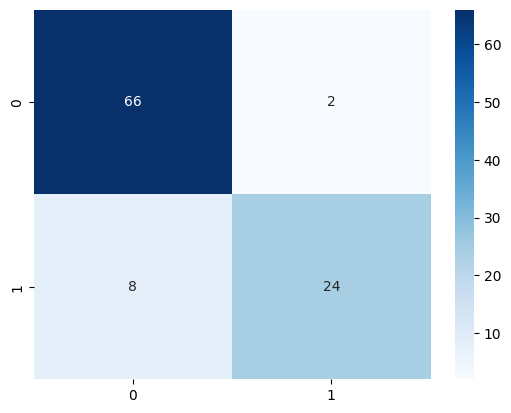

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, cmap='Blues')

In [26]:
# [[tp, tn]
#  [fp, fn]]

In [30]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9


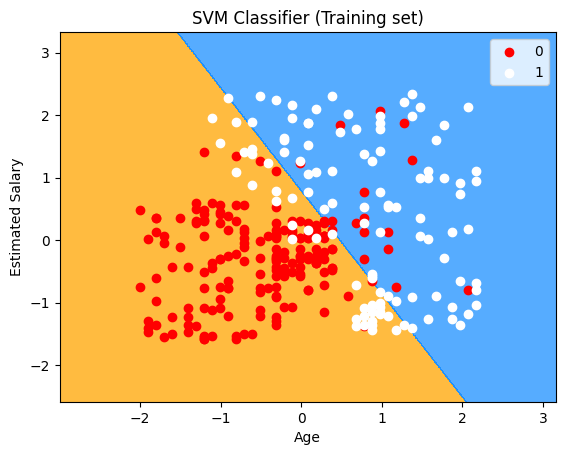

In [32]:
x_set, y_set = x_train, y_train

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01), np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('orange', 'dodgerblue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0 ], x_set[y_set ==j, 1], c = [ListedColormap(('red', 'white'))(i)], label = j)

plt.title('SVM Classifier (Training set)')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()

plt.show()